<a href="https://colab.research.google.com/github/viettran02/AI_project/blob/main/AI_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5447d7286bdbf4d258757fbc5cdc82702b2bfa6549f89d7c75258939cf206d8c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


AttributeError: ignored

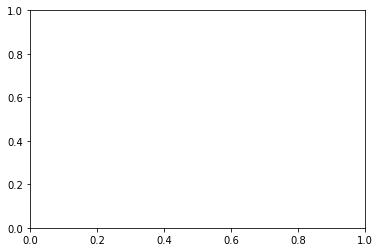

In [16]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


x = np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,lable = 'slow')
plt.plot

18.999341238471672


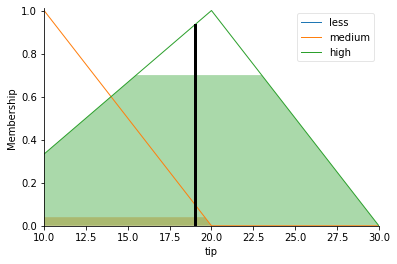

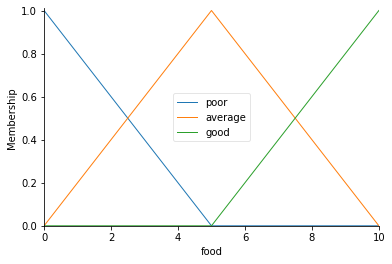

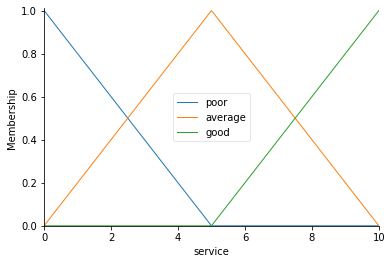

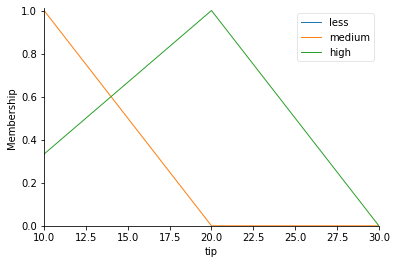

In [43]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average']= fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[0,0,10])
tip['medium']= fuzz.trimf(tip.universe,[0,10,20])
tip['high'] = fuzz.trimf(tip.universe,[5,20,30])

rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['medium'])
rule4=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['medium'])
rule6=ctrl.Rule(food['average']&service['good'],tip['high'])
rule7=ctrl.Rule(food['good']&service['poor'],tip['medium'])
rule8=ctrl.Rule(food['good']&service['average'],tip['high'])
rule9=ctrl.Rule(food['good']&service['good'],tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)
food.view()
service.view()
tip.view()
